In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("attacks_limpieza_1.csv", index_col = 0)
df.head(2)

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
0,1800.00.00,1800,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,F,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, all onboard were killed by sharks",1800
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,Reported May-28-1797


### EJERCICIO 1 ###

Columna de species: si exploramos esta columna en detalle nos podemos dar cuenta que tenemos muchos valores únicos y esto hace que sea muy difícil trabajar con esta columna. Lo que vamos a hacer es clasificar los tiburones en 5 especies diferentes, las más comunes, que incluyen el tiburón blanco (White), el tiburón tigre (Tiger ), el tiburón gris (Grey), el tiburón limón (Lemon) y el tiburón toro (Bull). El resto de las especies las incluiremos en un único grupo que podremos llamar "Unspecified".

In [3]:
patron_blanco = ".*(hite|HITE).*"
patron_tigre = '.*(iger|IGER).*'
patron_gris = '.*(rey|REY).*'
patron_limon = '.*(emon|EMON).*'
patron_toro = '.*(ull|ULL).*'

In [4]:
copia_df = df.copy()

In [5]:
clase_tiburon = []

def especie_tiburon(x):
    
    especies = copia_df[x]

    for row in especies:
        if re.match(patron_blanco, str(row)):
            clase_tiburon.append('White')
        elif re.match(patron_gris, str(row)):
            clase_tiburon.append('Grey')
        elif re.match(patron_tigre, str(row)):
            clase_tiburon.append('Tiger')
        elif re.match(patron_limon, str(row)):
            clase_tiburon.append('Lemon')
        elif re.match(patron_toro, str(row)):
            clase_tiburon.append('Bull')
        else:
            clase_tiburon.append('Undefined')

In [6]:
especie_tiburon('species_')

In [7]:
copia_df['shark_type'] = clase_tiburon

In [8]:
copia_df.sample()

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date,shark_type
2055,2001.11.14,2001,Unprovoked,usa,Hawaii,"Kapalua, Maui",Surfing,M. Schweitzer,NaN,NaN,17h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,"No injury, portion of board's lower surface re...",14-Nov-2001,Undefined


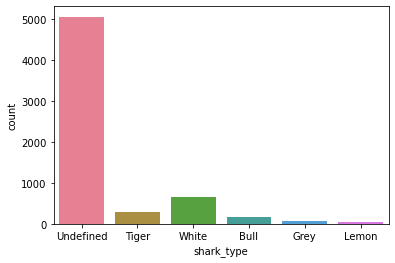

In [10]:
sns.countplot(x="shark_type", data=copia_df, palette="husl");

<font color='pink'> En esta gráfica podemos ver que la mayoría de nuestros datos están incompletos. Aún así, basándonos en los datos que sí tenemos vemos que los principales ataques son de tiburones blancos, seguidos de tiburones tigre y toro. 🦈</font>

### EJERCICIO 2 ###

Columna de age: es una columna de tipo string pero debería ser de tipo integer. Además, en esta columna nos vamos a encontrar con algunos errores tipográficos:
 - Edades formato string
 - Edades separadas por &, or, to, >
 - Edades con ?

In [9]:
df.head()

,case_number,year,type,country,area,location,activity,name,sex_,age,time,species_,href,fatal_(y/n),injury,date
0,1800.00.00,1800,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,F,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, all onboard were killed by sharks",1800
1,1797.05.28.R,1797,Unprovoked,NaN,NaN,NaN,Dropped overboard,child,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,FATAL,Reported May-28-1797
2,1792.09.12,1792,Provoked,england,NaN,On the Thames River,Fishing,male,M,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, PROVOKED INCIDENT",12-Sep-1792
3,1791.00.00,1791,Unprovoked,australia,New South Wales,Port Jackson,NaN,"female, an Australian aboriginal",F,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,Y,"FATAL, ""bitten in two""",1791
4,1788.05.10,1788,Boat,australia,New South Wales,Sydney Harbor,Fishing,boat,NaN,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,N,"No injury to occupants, shark bit oar and rudder",10-May-1788


In [11]:
copia_df['age'] = df['age'].astype(str)

In [21]:
patron_edades = r'\d+'          #preguntar si es buena práctica dejarlo fuera de la función
#otros patrones para probar: "[0-9]{1,2}", r'\b\d+\b'

In [22]:
def sacar_edades(col):
    x = re.findall(patron_edades, col)
    try:
        return x[0]
    except:
        return 'unspecified'

In [ ]:
df['age_new'] = df['age'].apply(sacar_edades)

In [13]:
lista_edades = []

def limpiar_edad(x):
    for row in x:
        if isinstance(row, str) == True:
            temp = re.findall(patron_edades, row)
            lista_edades.append(temp)
        else:
            lista_edades.append('0')


In [14]:
limpiar_edad(copia_df['age'])


In [15]:
copia_df['age_clean'] = lista_edades

In [ ]:
copia_df.sample(20)

In [ ]:
copia_df['age_clean'] = copia_df['age_clean'].astype(int)